## SVM on Iris Dataset
In this notebook we will use SVM on the iris dataset. This will also be an implementation of multiclass classification using the SVM algorithm.

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
# Loading the dataset
iris = datasets.load_iris()

# We use the first two features for demonstration purposes of plotting the DB
X = iris.data[:, 0:2]
Y = iris.target

X.shape, Y.shape

((150, 2), (150,))

In [18]:
# Splitting the dataset into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

# Inspect shapes
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((112, 2), (38, 2), (112,), (38,))

In [19]:
# Creating our classifier and fitting it on the training data
# SVC implements One vs One for multiclassification
clf = SVC()
clf.fit(X_train, Y_train)

C:\Users\sabee\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [20]:
clf.score(X_test, Y_test)

0.7631578947368421

In [21]:
# Function to help plot the decision boundary
# Will use only two features x1 and x2 to determine the decision boundary

def makegrid(x1, x2, h = 0.02):
    # Determine the ranges of x1 and x2
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    # Generate arrays that cover points in the range with a step size = h = 0.02 by default
    a = np.arange(x1_min, x1_max, h)
    b = np.arange(x2_min, x2_max, h)
    # Generate coordinate matrices from coordinate vectors
    xx, yy = np.meshgrid(a, b)
    return xx, yy

In [29]:
# x1 = np.array([1, 2])
# x2 = np.array([3, 4])
# xv, yv = makegrid(x1, x2)
# xv, yv

xv, yv = makegrid(X[:, 0], X[:, 1])
xv.shape, yv.shape

((220, 280), (220, 280))

[0 0 0 ... 2 2 2]


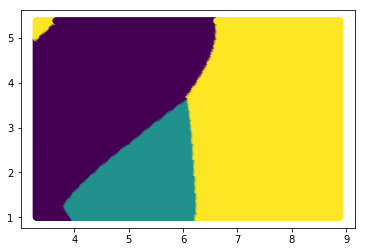

In [28]:
# Predicitons, DB and plotting
predictions = clf.predict(np.c_[xv.ravel(), yv.ravel()])
print(predictions)
plt.scatter(xv.ravel(), yv.ravel(), c=predictions)
plt.show()